In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load dataset
df = pd.read_csv('car.csv')

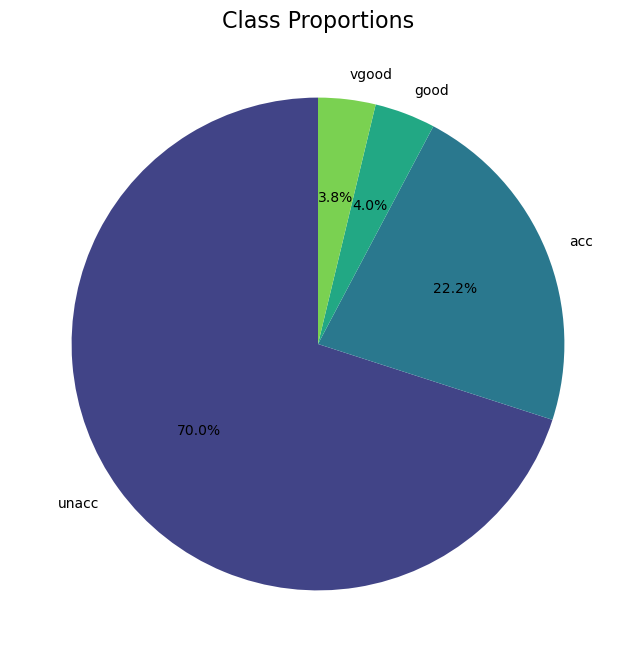

In [60]:
# Pie Chart for Target Class Proportions
target_col = 'class'
class_counts = df[target_col].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis", len(class_counts)))
plt.title("Class Proportions", fontsize=16)
plt.show()

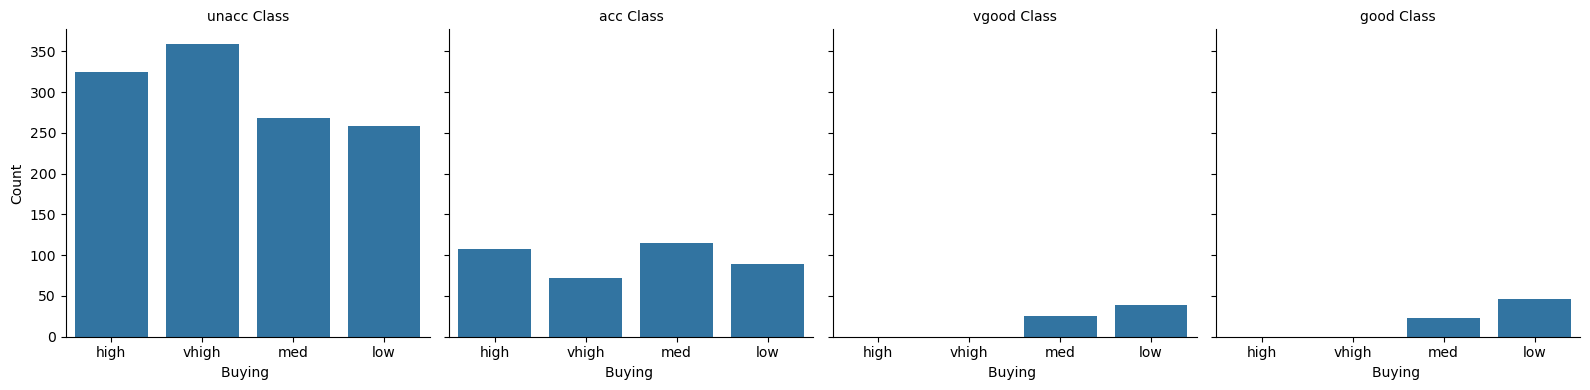

In [61]:
# Facet Grid to compare feature distributions by class
g = sns.FacetGrid(df, col='class', col_wrap=4, height=4)
g.map(sns.countplot, 'buying', order=df['buying'].unique())
g.set_titles("{col_name} Class")
g.set_axis_labels("Buying ", "Count")
plt.show()


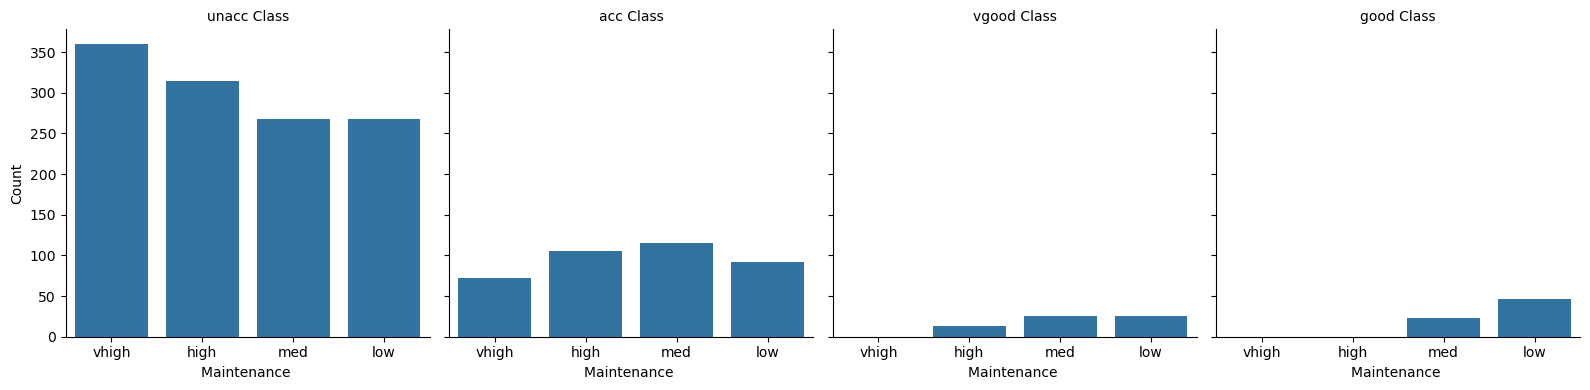

In [62]:
# Facet Grid to compare feature distributions by class
g = sns.FacetGrid(df, col='class', col_wrap=4, height=4)
g.map(sns.countplot, 'maint', order=df['maint'].unique())
g.set_titles("{col_name} Class")
g.set_axis_labels("Maintenance ", "Count")
plt.show()


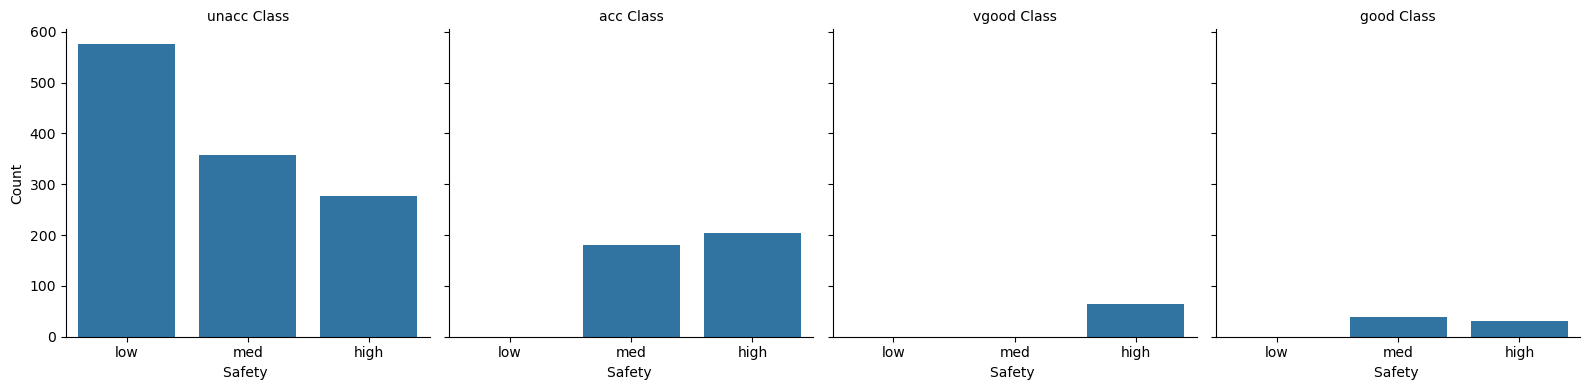

In [63]:
# Facet Grid to compare feature distributions by class
g = sns.FacetGrid(df, col='class', col_wrap=4, height=4)
g.map(sns.countplot, 'safety', order=df['safety'].unique())
g.set_titles("{col_name} Class")
g.set_axis_labels("Safety ", "Count")
plt.show()


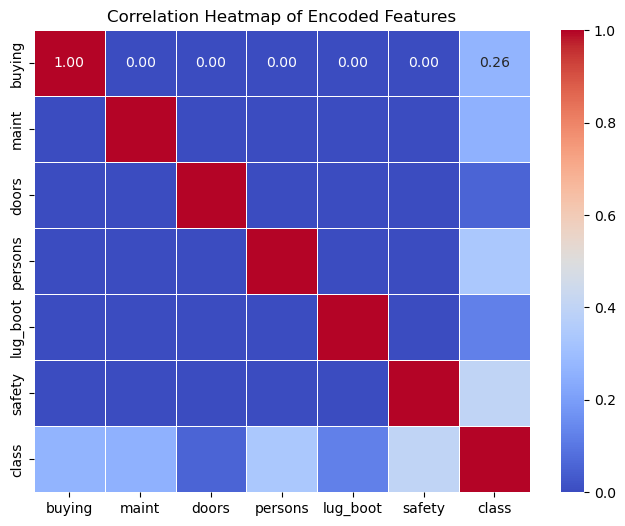

In [64]:
# 2. Heatmap of correlations (since it's categorical, we use 'category' encoding)
df_encoded = df.apply(lambda x: pd.factorize(x)[0])
corr = df_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Encoded Features')
plt.show()

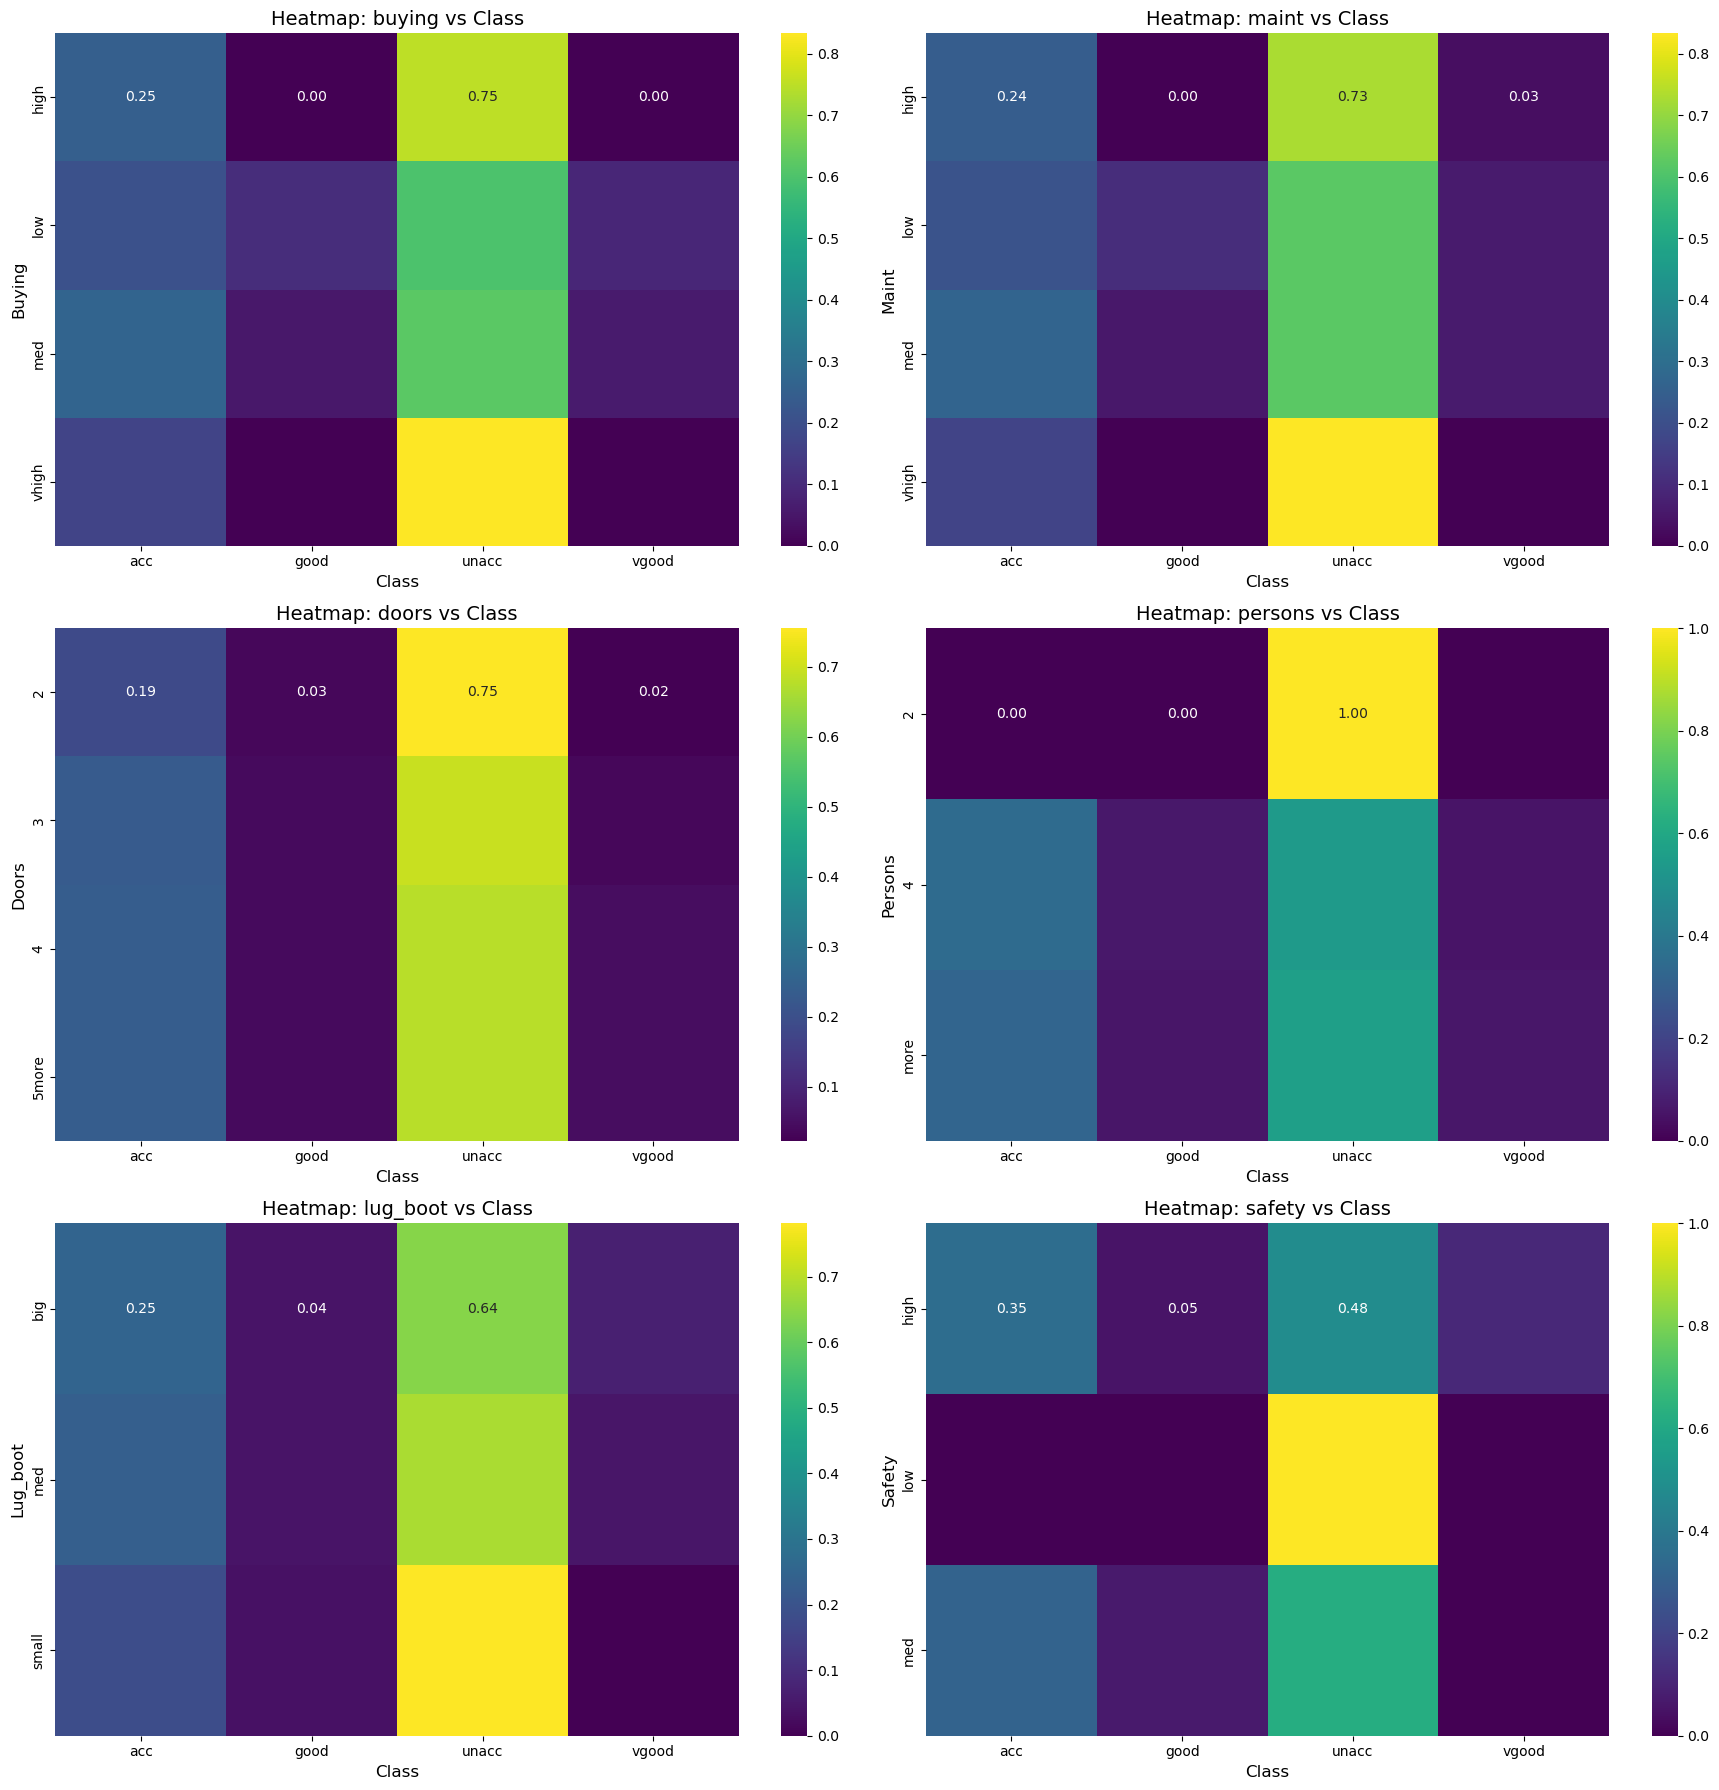

In [65]:
# List of categorical features
categorical_features = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

# Set up the grid for subplots
plt.figure(figsize=(18, 18))

# Loop through each feature to create heatmaps
for i, feature in enumerate(categorical_features, start=1):
    plt.subplot(3, 2, i)
    feature_class_counts = pd.crosstab(df[feature], df['class'], normalize='index')  # Normalize to show proportions
    sns.heatmap(feature_class_counts, annot=True, fmt=".2f", cmap="viridis", cbar=True)
    plt.title(f"Heatmap: {feature} vs Class", fontsize=14)
    plt.xlabel("Class", fontsize=12)
    plt.ylabel(feature.capitalize(), fontsize=12)

plt.tight_layout()
plt.show()